In [1]:
from IPython.display import display

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import pandas as pd

import mglearn

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

from sklearn.datasets import load_iris

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer, StandardScaler
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']=False

if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system() =='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\multicampus\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### 3.4.1 주성분 분석(PCA)

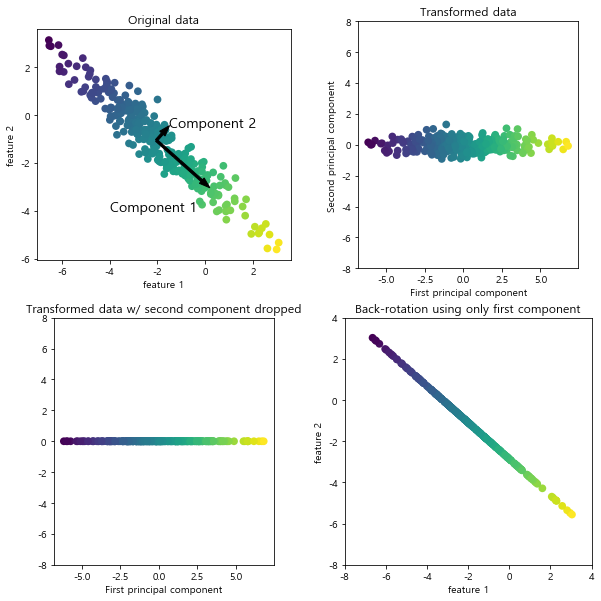

In [2]:
mglearn.plots.plot_pca_illustration()

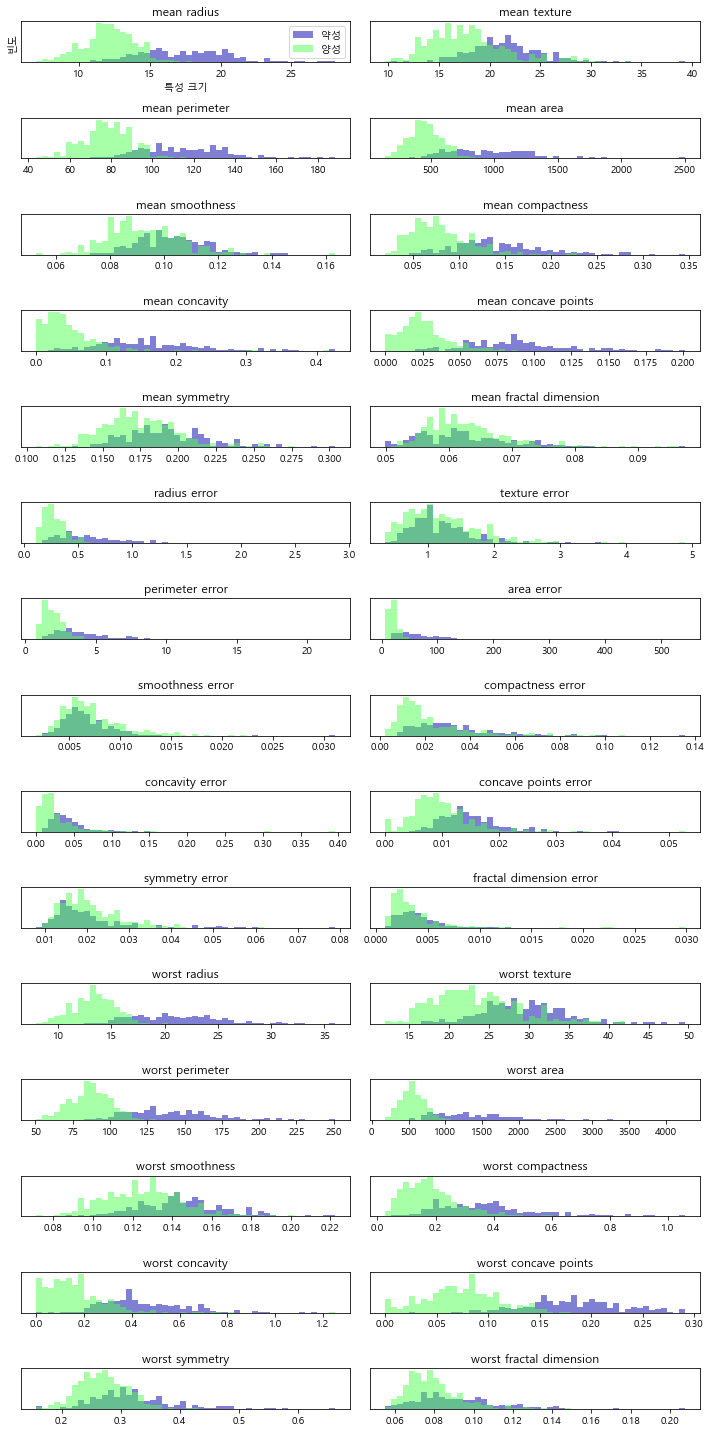

In [3]:
fig, axes = plt.subplots(15,2, figsize = (10,20))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target ==1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:,i], bins=bins, color = mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:,i], bins = bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['약성', '양성'], loc ='best')
fig.tight_layout()

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [5]:
from sklearn.decomposition import PCA
# 데이터의 처음 두 개 주성분만 유지시킵니다.
pca = PCA(n_components =2)
# 유방암 데이터로 PCA 모델을 만든다.
pca.fit(X_scaled)

# 처음 두개의 주성분을 사용해 데이터를 변화한다.
X_pca = pca.transform(X_scaled)
print('원본 데이터 형태:', str(X_scaled.shape))
print('축소된 데이터 형태:', str(X_pca.shape))

원본 데이터 형태: (569, 30)
축소된 데이터 형태: (569, 2)


Text(0, 0.5, '두 번째 주성분')

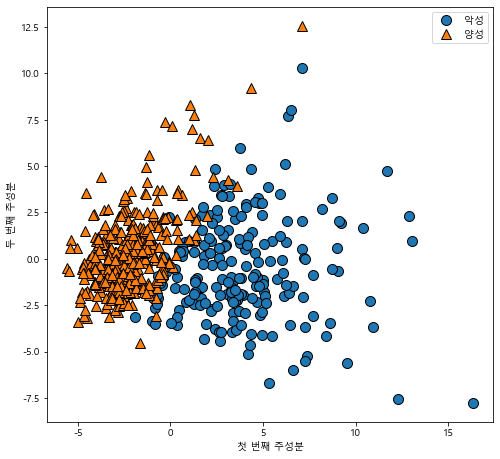

In [6]:
# 클래스를 색깔로 구분하여 처음 두개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:,1], cancer.target)
plt.legend(['악성', '양성'], loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')

In [7]:
print('PCA 주성분 형태:', pca.components_.shape)

PCA 주성분 형태: (2, 30)


In [8]:
print('pca 주성분:\n', pca.components_)

pca 주성분:
 [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, '주성분')

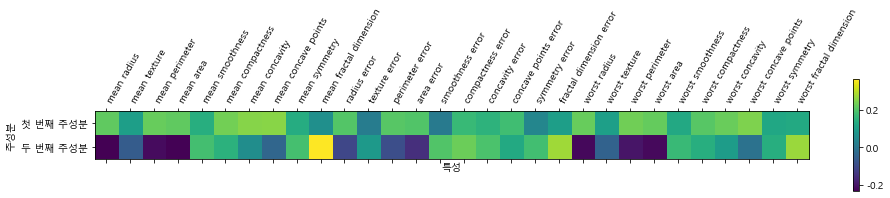

In [9]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['첫 번째 주성분', '두 번째 주성분'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotation =60, ha ='left')
plt.xlabel('특성')
plt.ylabel('주성분')

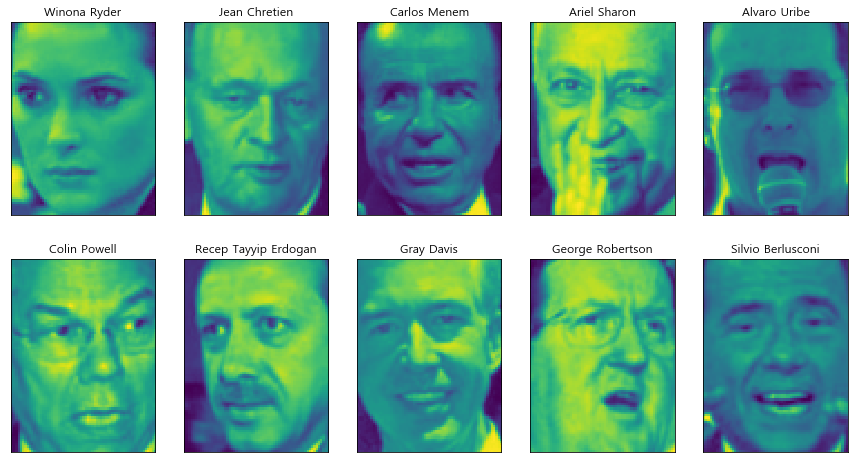

In [10]:
from sklearn.datasets import fetch_lfw_people
people =fetch_lfw_people(min_faces_per_person = 20, resize =0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2,5, figsize = (15,8),
                       subplot_kw= {'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [11]:
print('peaple.images.shape:', people.images.shape)
print('클래스 개수:', len(people.target_names))

peaple.images.shape: (3023, 87, 65)
클래스 개수: 62


In [12]:
# 각 타깃이 나타난 횟수 계산
counts = np.bincount(people.target)
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:10}'.format(name, count), end='   ')
    if (i+1)%3==0:
        print()

Alejandro Toledo                  39   Alvaro Uribe                      35   Amelie Mauresmo                   21   
Andre Agassi                      36   Angelina Jolie                    20   Ariel Sharon                      77   
Arnold Schwarzenegger             42   Atal Bihari Vajpayee              24   Bill Clinton                      29   
Carlos Menem                      21   Colin Powell                     236   David Beckham                     31   
Donald Rumsfeld                  121   George Robertson                  22   George W Bush                    530   
Gerhard Schroeder                109   Gloria Macapagal Arroyo           44   Gray Davis                        26   
Guillermo Coria                   30   Hamid Karzai                      22   Hans Blix                         39   
Hugo Chavez                       71   Igor Ivanov                       20   Jack Straw                        28   
Jacques Chirac                    52   Jean Chretien    

In [13]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1
    
X_people = people.data[mask]
y_people = people.target[mask]

# 0~255 사이의 흑백 이미지의 픽셀 값을 0~1 스케일로 조정합니다.
# (옮긴이) MinMaxScaler를 적용하는 것과 거의 같습니다
X_people = X_people /255.

In [14]:
from sklearn.neighbors import KNeighborsClassifier
# 데이터를 훈련세트와 테스트 세트로 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify= y_people, random_state = 0)
# 이웃 개수를 한개로 하여 KNeighborsClassifier 모델을 만든다
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(X_train, y_train)
print('1-최근접 이웃의 테스트 세트 점수:{:.2f}'.format(knn.score(X_test,y_test)))

1-최근접 이웃의 테스트 세트 점수:0.23


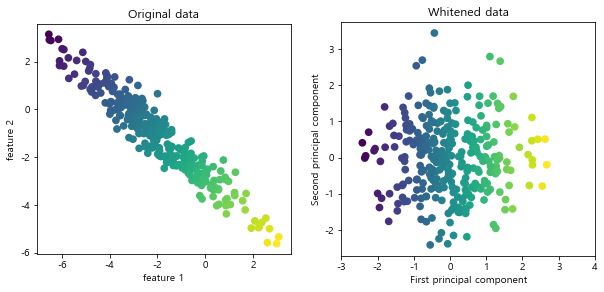

In [15]:
mglearn.plots.plot_pca_whitening()

In [16]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print('X_train_pca.shape:', X_train_pca.shape)

X_train_pca.shape: (1547, 100)


In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print('테스트 세트의 정확도:{:.2f}'.format(knn.score(X_test_pca, y_test)))

테스트 세트의 정확도:0.31


In [18]:
print('pca.components_.shape:', pca.components_.shape)

pca.components_.shape: (100, 5655)


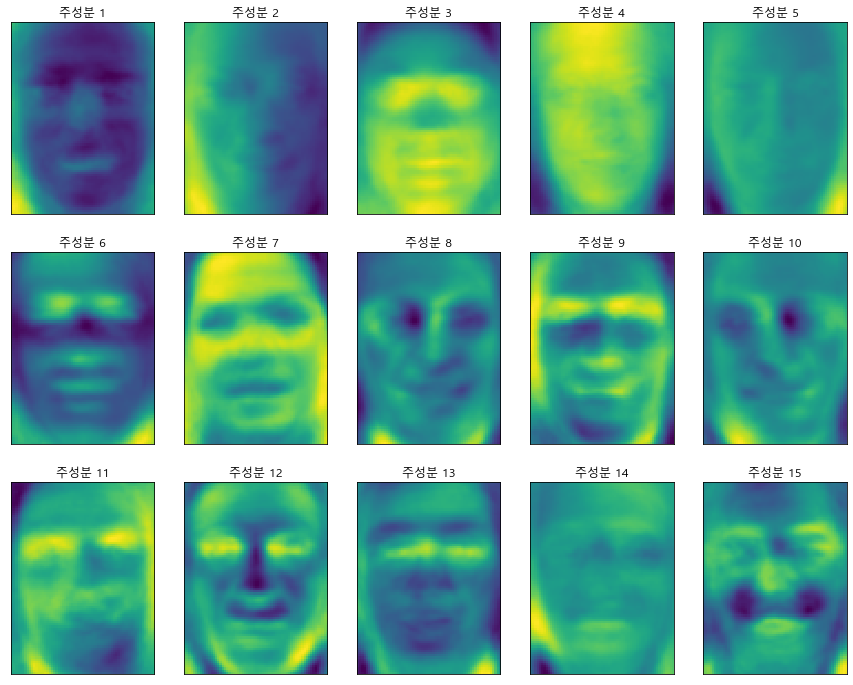

In [19]:
fig, axes = plt.subplots(3,5, figsize= (15,12), subplot_kw={'xticks': (), 'yticks' : ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    
    ax.imshow(component.reshape(image_shape), cmap = 'viridis')
    ax.set_title('주성분 {}'.format((i+1)))


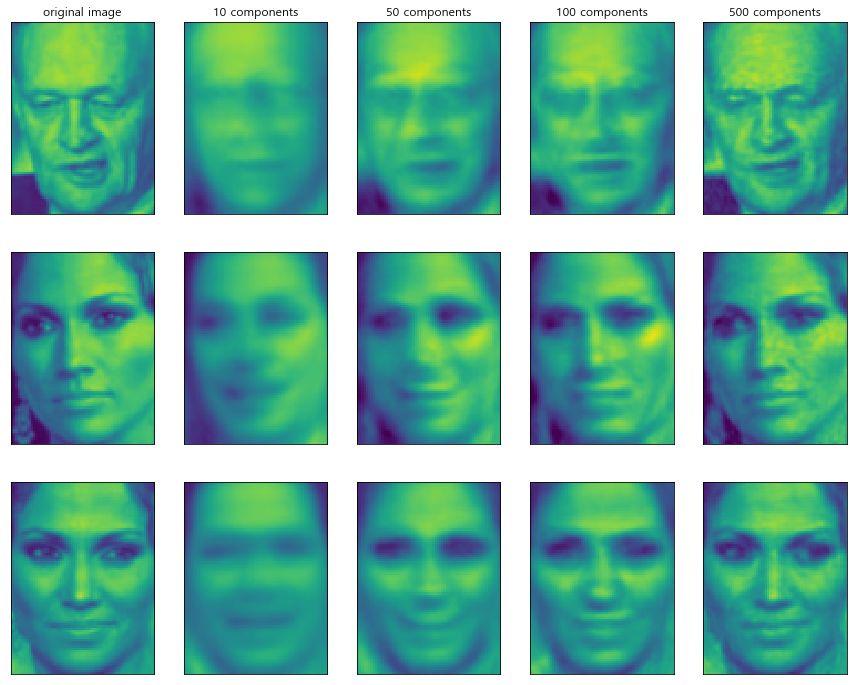

In [20]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, '두번째 주성분')

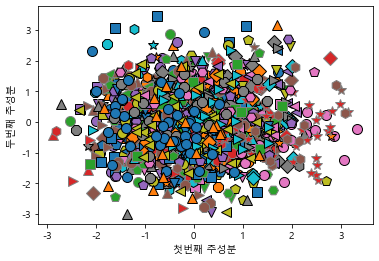

In [21]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel('첫번째 주성분')
plt.ylabel('두번째 주성분')

### 3.4.2 비음수 행렬 분해(NMF)

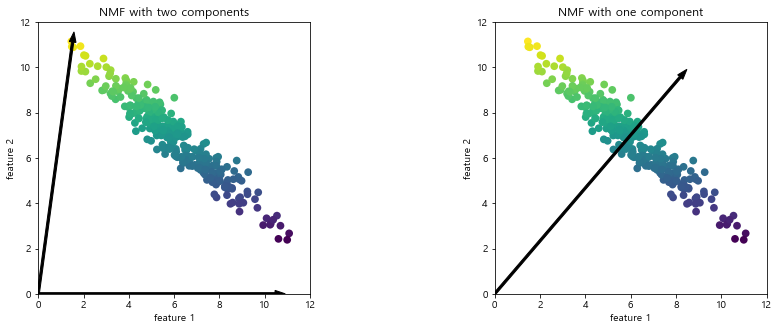

In [22]:
mglearn.plots.plot_nmf_illustration()

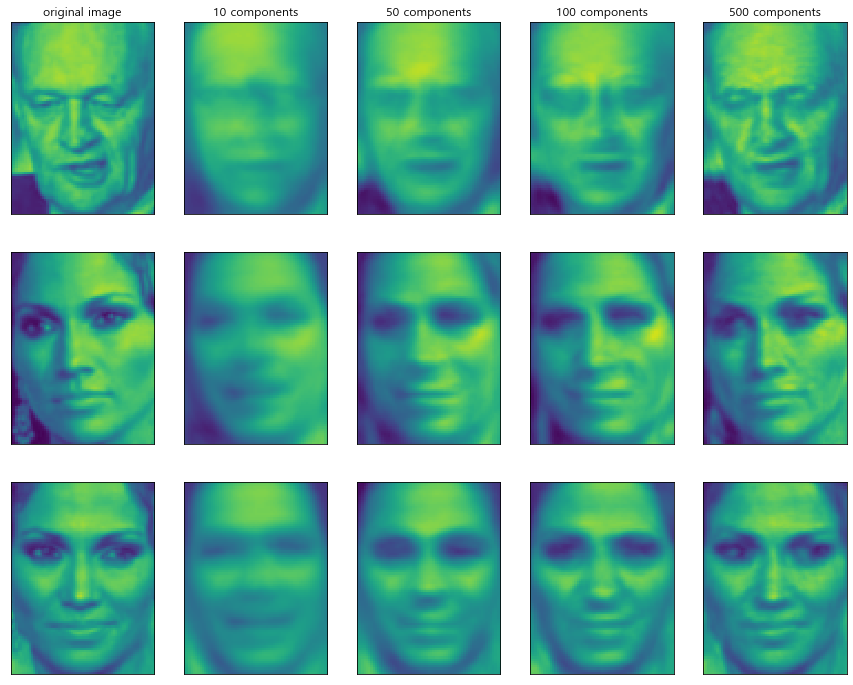

In [23]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image.shape)

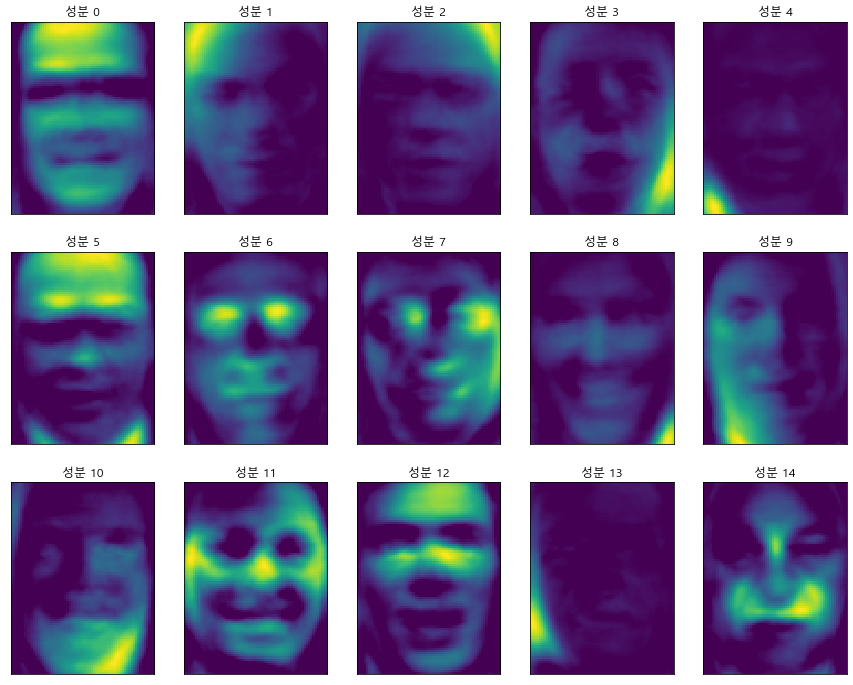

In [27]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state = 0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fig, axes = plt.subplots(3,5, figsize=(15,12), subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('성분 {}'.format(i))

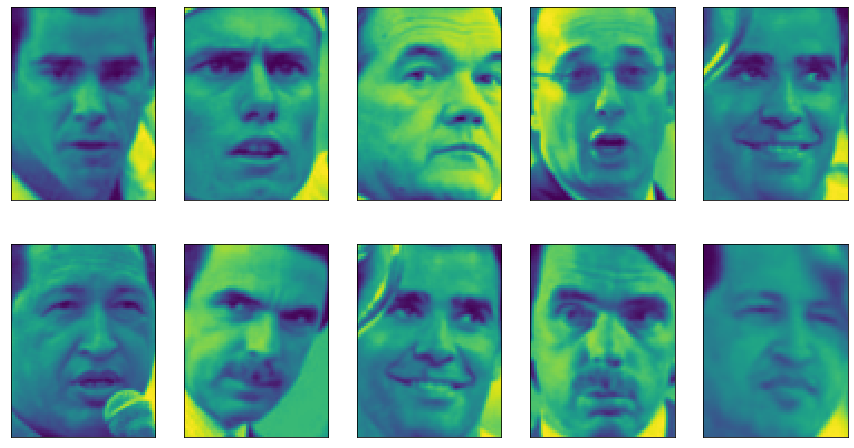

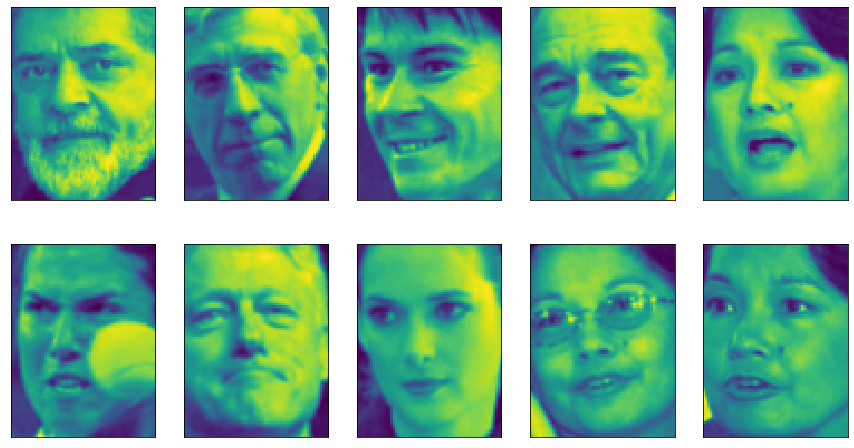

In [30]:
compn=3
# 4번째 성분으로 정렬한 처음 10개 이미지를 추출한다.
inds =np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2,5, figsize=(15,8), subplot_kw = {'xticks':(), 'yticks':()})

for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))
    
compn=7
#8번째 성분으로 정렬하여 처음 10개 이미지를 출력한다.
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig,axes = plt.subplots(2,5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, '신호')

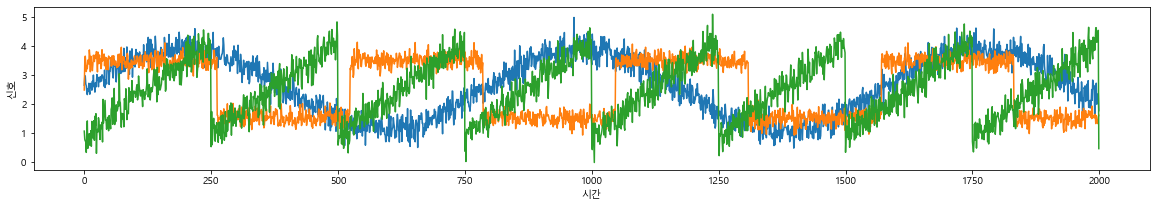

In [41]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(20,3))
plt.plot(S, '-')
plt.xlabel('시간')
plt.ylabel('신호')

In [42]:
# 원본 데이터를 사용해 100개의 측정 데이터를 만든다
A = np.random.RandomState(0).uniform(size=(100,3))
X = np.dot(S,A.T)
print('측정 데이터 형태:', X.shape)

측정 데이터 형태: (2000, 100)


In [43]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print('복원한 신호 데이터 형태:', S_.shape)

복원한 신호 데이터 형태: (2000, 3)


In [45]:
pca = PCA(n_components =3)
H = pca.fit_transform(X)

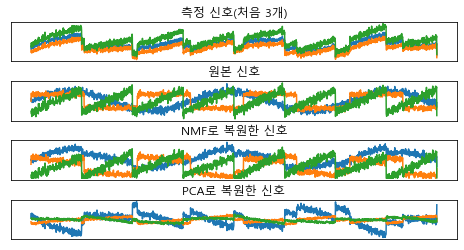

In [47]:
models = [X,S,S_,H]
names = ['측정 신호(처음 3개)',
        '원본 신호',
        'NMF로 복원한 신호',
        'PCA로 복원한 신호']
fig, axes = plt.subplots(4, figsize=(8,4), gridspec_kw={'hspace':.5}, subplot_kw={'xticks':(), 'yticks':()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:,:3], '-')

### 3.4.3 t-SNE를 이용한 매니폴드 학습

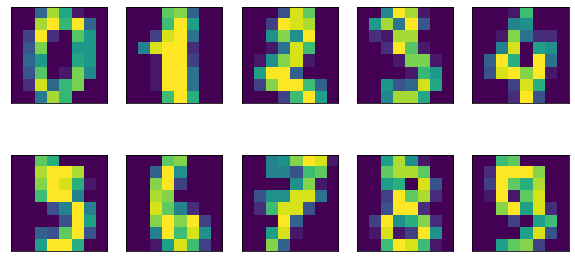

In [50]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2,5, figsize=(10,5), subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, '두 번째 주성분')

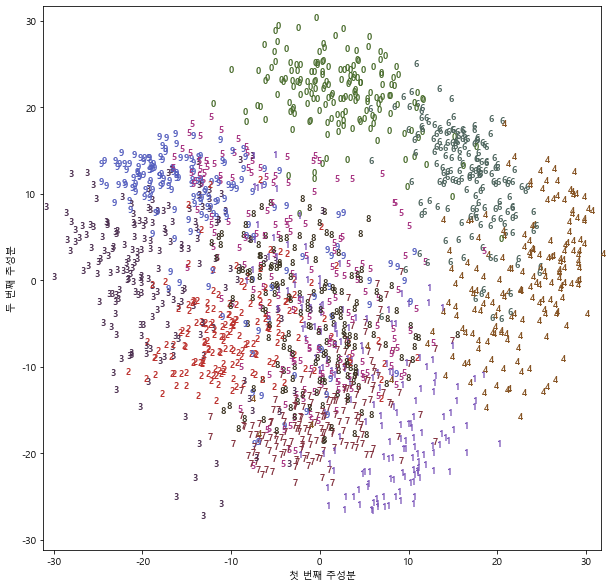

In [53]:
# PCA 모델을 생성한다.
pca = PCA(n_components=2)
pca.fit(digits.data)
#처음 두개의 주성분으로 숫자 데이터를 변환한다.
digits_pca = pca.transform(digits.data)
colors = ['#476A2A', '#7851B8', '#BD3430', '#4A2D4E', '#875525',
         '#A83683', '#4E655E', '#853541', '#3A3120', '#535DBE']
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,0].min(), digits_pca[:,0].max())
for i in range(len(digits.data)):
    # 숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(digits_pca[i,0], digits_pca[i,1], str(digits.target[i]),
            color = colors[digits.target[i]],
            fontdict = {'weight': 'bold', 'size':9})
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')

In [55]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 42)
# TSNE에는 transform 매서드가 없으므로 대신 fit_transform를 사용 한다.
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE 특성 1')

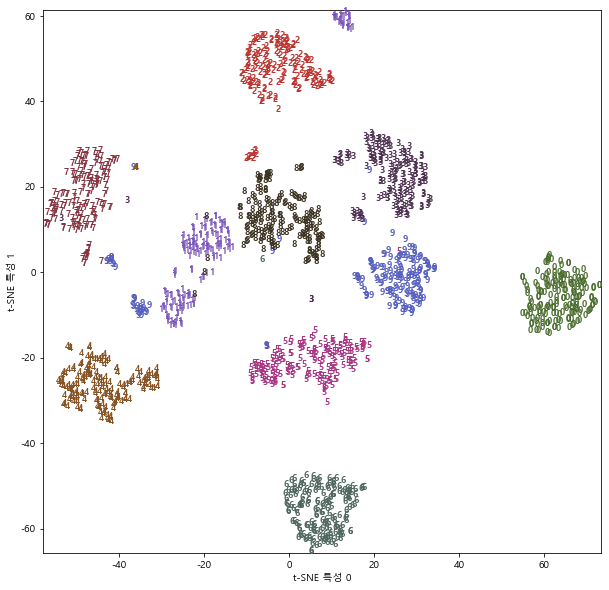

In [58]:
plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)
for i in range(len(digits.data)):
    #숫자 텍스트를 이용해 산점도를 그린다.
    plt.text(digits_tsne[i,0], digits_tsne[i, 1], str(digits.target[i]),
            color=colors[digits.target[i]],
            fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('t-SNE 특성 0')
plt.ylabel('t-SNE 특성 1')